In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF


import Bgolearn.BGOsampling as BGOS 

In [10]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [11]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [12]:
virtual_samples = np.linspace(0,11,100)

## define a callable Kriging model and sampling function

In [13]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_list = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_list.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_list))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std)


## instantiate Bgolearn

In [24]:
Bgolearn = BGOS.Bgolearn()
method_name = 'EI'
obs = 5

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Expected Improvement : 
 x =  [8.55555556]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.1092765031327496
2 -th sampling, result =  3.7271583159869444
3 -th sampling, result =  3.9106876018486316
4 -th sampling, result =  4.423171397785779
5 -th sampling, result =  4.115937065563159
evaluated mean of added datum: [3.85724618]
evaluated std of added datum: 0.43964299194799294
---------------------------------------

1-th iteration 
 new added datum: [8.6, array([3.8572])]


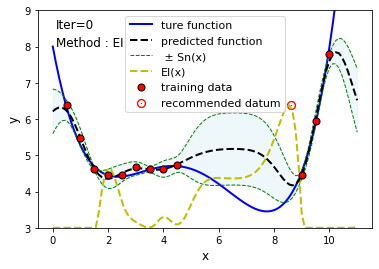

current optimal is : 3.8572
The next datum recomended by Expected Improvement : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.921111670134686
2 -th sampling, result =  3.443050685827913
3 -th sampling, result =  3.415861967129987
4 -th sampling, result =  3.4418376412080125
5 -th sampling, result =  3.452800935367938
evaluated mean of added datum: [3.53493258]
evaluated std of added datum: 0.1934769534915187
---------------------------------------

2-th iteration 
 new added datum: [8.2, array([3.5349])]


<Figure size 432x288 with 0 Axes>

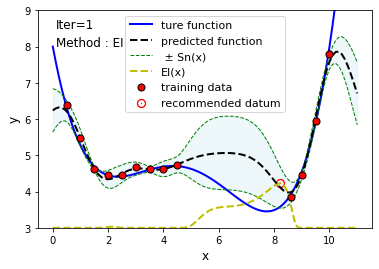

current optimal is : 3.5349
The next datum recomended by Expected Improvement : 
 x =  [7.33333333]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  5.1134787270539075
2 -th sampling, result =  2.9574103099206486
3 -th sampling, result =  3.1100233334784306
4 -th sampling, result =  3.593116727426209
5 -th sampling, result =  3.6130099629818653
evaluated mean of added datum: [3.67740781]
evaluated std of added datum: 0.7633967896747084
---------------------------------------

3-th iteration 
 new added datum: [7.3, array([3.6774])]


<Figure size 432x288 with 0 Axes>

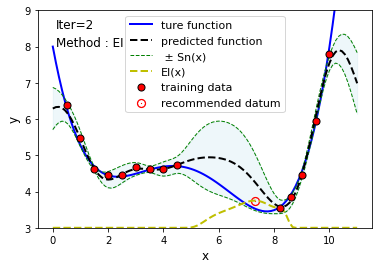

current optimal is : 3.5349
The next datum recomended by Expected Improvement : 
 x =  [7.55555556]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.330667080292604
2 -th sampling, result =  3.066026746325025
3 -th sampling, result =  2.434087961613416
4 -th sampling, result =  4.591854466412103
5 -th sampling, result =  1.1994848312109312
evaluated mean of added datum: [2.92442422]
evaluated std of added datum: 1.1118681311140124
---------------------------------------

4-th iteration 
 new added datum: [7.6, array([2.9244])]


<Figure size 432x288 with 0 Axes>

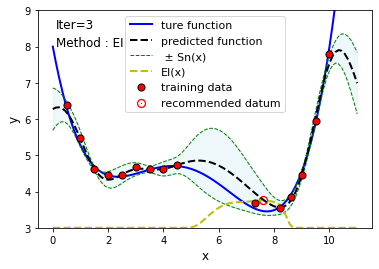

<Figure size 432x288 with 0 Axes>

In [27]:
data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,8,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,8.5,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break